In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install -qU --upgrade pip
!pip install -qU kaggle ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 170.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 155.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 138.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 150.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 144.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 174.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
!ls drive/MyDrive/cse396_datasets/no_banana_dataset.zip

drive/MyDrive/cse396_datasets/no_banana_dataset.zip


In [4]:
# 2️⃣ Unzip the dataset archive into Colab local storage
dataset_zip = '/content/drive/MyDrive/cse396_datasets/no_banana_dataset.zip'
!unzip -q "$dataset_zip" -d /content/no_banana_dataset
!ls /content/no_banana_dataset


__MACOSX  no_banana_dataset


In [5]:
# 3️⃣ Count images & labels per split (corrected paths)
import os

base = '/content/no_banana_dataset/no_banana_dataset'
splits = ['train', 'valid', 'test']

for s in splits:
    img_dir = os.path.join(base, s, 'images')
    lbl_dir = os.path.join(base, s, 'labels')
    n_img = len([f for f in os.listdir(img_dir) if f.lower().endswith(('.jpg', '.png', '.jpeg'))])
    n_lbl = len([f for f in os.listdir(lbl_dir) if f.endswith('.txt')])
    print(f"{s:5s}: {n_img:5d} images, {n_lbl:5d} labels")


train: 12764 images, 12764 labels
valid:  2006 images,  2006 labels
test :  1284 images,  1284 labels


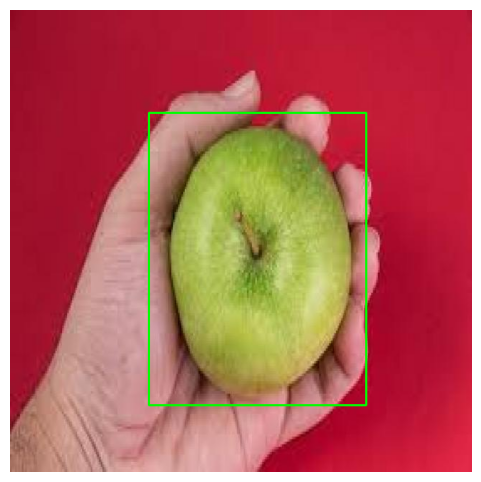

In [6]:
# 4️⃣ Display a sample image + YOLO-format box (using corrected paths)
import cv2
import matplotlib.pyplot as plt
import os

base = '/content/no_banana_dataset/no_banana_dataset'

def show_sample(split='train', idx=0):
    img_dir = os.path.join(base, split, 'images')
    lbl_dir = os.path.join(base, split, 'labels')
    imgs = sorted([f for f in os.listdir(img_dir) if f.lower().endswith(('.jpg','.png','.jpeg'))])
    img_name = imgs[idx]
    img_path = os.path.join(img_dir, img_name)
    lbl_path = os.path.join(lbl_dir, img_name.rsplit('.',1)[0] + '.txt')

    img = cv2.imread(img_path)
    h, w = img.shape[:2]
    with open(lbl_path) as f:
        for line in f:
            cls, x_c, y_c, bw, bh = map(float, line.split())
            x1 = int((x_c - bw/2) * w)
            y1 = int((y_c - bh/2) * h)
            x2 = int((x_c + bw/2) * w)
            y2 = int((y_c + bh/2) * h)
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

# Show the first sample in train
show_sample('train', 0)


In [7]:
%%bash
cat > /content/no_banana_dataset/data.yaml <<EOF
# Dataset config for Ultralytics YOLOv8
path: /content/no_banana_dataset/no_banana_dataset    # root directory for train/ valid/ test/
train: train/images
val:   valid/images
test:  test/images

nc: 6
names: ['apple_fresh', 'apple_rotten',
        'potato_fresh', 'potato_rotten',
        'orange_fresh', 'orange_rotten']
EOF

# verify
echo "---- data.yaml ----"
cat /content/no_banana_dataset/data.yaml


---- data.yaml ----
# Dataset config for Ultralytics YOLOv8
path: /content/no_banana_dataset/no_banana_dataset    # root directory for train/ valid/ test/
train: train/images
val:   valid/images
test:  test/images

nc: 6
names: ['apple_fresh', 'apple_rotten',
        'potato_fresh', 'potato_rotten',
        'orange_fresh', 'orange_rotten']


In [8]:
from ultralytics import YOLO

# Initialize a YOLOv8n model
model = YOLO("yolov8n.pt")

# Create checkpoint directory in Drive
checkpoint_dir = '/content/drive/MyDrive/yolo_checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

model.train(
    data="/content/no_banana_dataset/data.yaml",
    epochs=200,
    patience=50,
    imgsz=640,
    batch=16,
    lr0=0.005,
    cos_lr=True,
    mosaic=1.0,
    mixup=0.4,
    freeze=10,
    save_period=20,  # Save checkpoint every 20 epochs
    project="/content/drive/MyDrive/runs_no_banana/train",  # Save to Drive
    name="no_banana"
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 372MB/s]

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)


engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/no_banana_dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=10, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.005, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.4, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=no_banana, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=50, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=False, project=/content/drive/MyDrive/runs_no_banana/train

100%|██████████| 755k/755k [00:00<00:00, 115MB/s]

Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,012,018 parameters, 3,012,002 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.0.conv.weight'
Freezing layer 'model.0.bn.weight'
Freezing layer 'model.0.bn.bias'
Freezing layer 'model.1.conv.weight'
Freezing layer 'model.1.bn.weight'
Freezing layer 'model.1.bn.bias'
Freezing layer 'model.2.cv1.conv.weight'
Freezing layer 'model.2.cv1.bn.weight'
Freezing layer 'model.2.cv1.bn.bias'
Freezing layer 'model.2.cv2.conv.weight'
Freezing layer 'model.2.cv2.bn.weight'
Freezing layer 'model.2.cv2.bn.bias'
Freezing layer 'model.2.m.0.cv1.conv.weight'
Freezing layer 'model.2.m.0.cv1.bn.weight'
Freezing layer 'model.2.m.0.cv1.bn.bias'
Freezing layer 'model.2.m.0.cv2.conv.weight'
Freezing layer 'model.2.m.0.cv2.bn.weight'
Freezing layer 'model.2.m.0.cv2.bn.bias'
Freezing layer 'model.3.conv.weight'
Freezing layer 'model.3.bn.weight'
Freezing layer 'model.3.bn.bias'
Freezing layer 'model.4.cv1.conv.weight'
Freezing layer 'mode

100%|██████████| 5.35M/5.35M [00:00<00:00, 330MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.1±0.1 ms, read: 617.9±295.9 MB/s, size: 25.8 KB)


train: Scanning /content/no_banana_dataset/no_banana_dataset/train/labels... 12764 images, 287 backgrounds, 0 corrupt: 100%|██████████| 12764/12764 [00:08<00:00, 1543.30it/s]


train: New cache created: /content/no_banana_dataset/no_banana_dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 438.5±236.6 MB/s, size: 11.8 KB)


val: Scanning /content/no_banana_dataset/no_banana_dataset/valid/labels... 2006 images, 99 backgrounds, 0 corrupt: 100%|██████████| 2006/2006 [00:01<00:00, 1234.42it/s]


val: New cache created: /content/no_banana_dataset/no_banana_dataset/valid/labels.cache
Plotting labels to /content/drive/MyDrive/runs_no_banana/train/no_banana/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/runs_no_banana/train/no_banana
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      1.27G      1.067      2.193      1.495         63        640: 100%|██████████| 798/798 [01:08<00:00, 11.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:10<00:00,  5.87it/s]


                   all       2006       2571      0.716      0.775      0.781       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      2.24G      1.011      1.542      1.425         45        640: 100%|██████████| 798/798 [01:03<00:00, 12.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  7.89it/s]


                   all       2006       2571      0.702      0.794      0.822      0.602

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      2.24G      1.031      1.357      1.433         57        640: 100%|██████████| 798/798 [01:01<00:00, 12.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.00it/s]


                   all       2006       2571      0.835      0.846      0.874      0.644

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      2.24G      1.034      1.225      1.431         59        640: 100%|██████████| 798/798 [01:01<00:00, 12.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.23it/s]


                   all       2006       2571      0.819      0.844       0.87      0.659

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      2.25G      1.001      1.134      1.412         91        640: 100%|██████████| 798/798 [01:01<00:00, 12.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.27it/s]


                   all       2006       2571      0.829       0.87      0.897      0.715

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      2.26G     0.9812      1.084      1.395         56        640: 100%|██████████| 798/798 [01:01<00:00, 12.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.11it/s]


                   all       2006       2571      0.867       0.87      0.899      0.712

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      2.27G     0.9561      1.039      1.375         43        640: 100%|██████████| 798/798 [01:01<00:00, 12.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.42it/s]

                   all       2006       2571      0.855      0.875       0.91       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      2.28G     0.9445      1.014      1.369         47        640: 100%|██████████| 798/798 [01:01<00:00, 12.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.39it/s]


                   all       2006       2571       0.86      0.886      0.903      0.735

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      2.29G     0.9329      1.003      1.365         43        640: 100%|██████████| 798/798 [01:02<00:00, 12.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.28it/s]

                   all       2006       2571      0.874      0.878      0.915      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200       2.3G     0.9211      0.979       1.35         38        640: 100%|██████████| 798/798 [01:01<00:00, 13.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.22it/s]

                   all       2006       2571      0.891      0.893      0.925      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200       2.3G     0.9099     0.9592      1.344         79        640: 100%|██████████| 798/798 [01:01<00:00, 12.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.34it/s]


                   all       2006       2571      0.871      0.894       0.91      0.726

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      2.31G     0.9002     0.9417      1.333         47        640: 100%|██████████| 798/798 [01:01<00:00, 12.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.30it/s]

                   all       2006       2571      0.883      0.895      0.914      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      2.32G      0.891     0.9303      1.332         52        640: 100%|██████████| 798/798 [01:01<00:00, 12.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.37it/s]


                   all       2006       2571      0.884      0.892      0.922      0.728

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      2.33G     0.8861     0.9214      1.325         54        640: 100%|██████████| 798/798 [01:02<00:00, 12.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.34it/s]

                   all       2006       2571      0.898       0.91      0.928      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      2.34G     0.8792     0.9132      1.322         43        640: 100%|██████████| 798/798 [01:01<00:00, 13.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.23it/s]

                   all       2006       2571      0.888      0.907      0.923      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      2.35G     0.8816     0.9057      1.322         63        640: 100%|██████████| 798/798 [01:01<00:00, 13.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.32it/s]

                   all       2006       2571       0.89      0.899      0.921       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      2.36G     0.8695     0.8996      1.314         66        640: 100%|██████████| 798/798 [01:01<00:00, 12.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.32it/s]

                   all       2006       2571      0.886      0.898      0.921      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      2.37G     0.8636     0.8859      1.312         49        640: 100%|██████████| 798/798 [01:01<00:00, 13.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.39it/s]

                   all       2006       2571      0.888      0.899      0.925      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      2.38G     0.8595     0.8908       1.31         49        640: 100%|██████████| 798/798 [01:01<00:00, 13.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.30it/s]

                   all       2006       2571      0.894      0.902      0.923      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      2.39G     0.8526     0.8817      1.303         52        640: 100%|██████████| 798/798 [01:01<00:00, 12.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.24it/s]

                   all       2006       2571      0.888       0.91      0.926      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200       2.4G     0.8526     0.8741      1.297         84        640: 100%|██████████| 798/798 [01:01<00:00, 12.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.12it/s]

                   all       2006       2571      0.891      0.917      0.927      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200       2.4G     0.8492     0.8632      1.299         54        640: 100%|██████████| 798/798 [01:00<00:00, 13.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.33it/s]


                   all       2006       2571      0.896      0.917      0.929      0.757

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      2.41G     0.8432     0.8726      1.298         52        640: 100%|██████████| 798/798 [01:01<00:00, 12.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.50it/s]

                   all       2006       2571      0.899       0.92      0.932      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      2.42G     0.8386     0.8588      1.294         65        640: 100%|██████████| 798/798 [01:01<00:00, 13.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.34it/s]

                   all       2006       2571      0.903      0.923      0.931      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      2.43G     0.8378     0.8568      1.292         57        640: 100%|██████████| 798/798 [01:01<00:00, 12.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.40it/s]

                   all       2006       2571      0.884      0.916      0.929      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      2.44G     0.8355     0.8527       1.29         44        640: 100%|██████████| 798/798 [01:01<00:00, 13.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.32it/s]

                   all       2006       2571      0.905      0.914      0.929       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      2.45G     0.8271     0.8435      1.283         54        640: 100%|██████████| 798/798 [01:01<00:00, 13.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.30it/s]

                   all       2006       2571      0.894      0.913      0.931      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      2.46G     0.8235     0.8369      1.282         47        640: 100%|██████████| 798/798 [01:01<00:00, 13.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.27it/s]

                   all       2006       2571      0.894      0.908      0.934      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      2.47G     0.8224     0.8356      1.284         51        640: 100%|██████████| 798/798 [01:00<00:00, 13.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.47it/s]

                   all       2006       2571        0.9       0.92      0.934      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      2.48G     0.8239      0.835      1.284         56        640: 100%|██████████| 798/798 [01:01<00:00, 13.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.30it/s]

                   all       2006       2571      0.904      0.918      0.934      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      2.49G       0.82     0.8333      1.278         59        640: 100%|██████████| 798/798 [01:01<00:00, 12.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.38it/s]

                   all       2006       2571      0.898      0.917      0.936      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      2.49G     0.8199     0.8253      1.276         80        640: 100%|██████████| 798/798 [01:01<00:00, 12.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.16it/s]

                   all       2006       2571      0.891      0.918      0.933      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200       2.5G     0.8178      0.828      1.275         71        640: 100%|██████████| 798/798 [01:01<00:00, 13.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.30it/s]

                   all       2006       2571      0.897      0.918      0.933      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      2.51G     0.8162     0.8194      1.275         73        640: 100%|██████████| 798/798 [01:01<00:00, 13.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.46it/s]

                   all       2006       2571      0.909      0.912      0.936      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      2.52G     0.8137     0.8169      1.276         61        640: 100%|██████████| 798/798 [01:01<00:00, 13.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.23it/s]

                   all       2006       2571      0.902       0.92      0.935      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      2.53G     0.8057     0.8115      1.265         75        640: 100%|██████████| 798/798 [01:01<00:00, 12.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.35it/s]

                   all       2006       2571      0.915       0.91      0.934      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      2.54G     0.8071     0.8175      1.272         45        640: 100%|██████████| 798/798 [01:02<00:00, 12.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.31it/s]

                   all       2006       2571      0.904      0.921      0.936      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      2.55G     0.8047     0.8087      1.268         67        640: 100%|██████████| 798/798 [01:01<00:00, 12.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.31it/s]

                   all       2006       2571      0.901      0.927      0.936      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      2.56G     0.7982     0.8075      1.261         63        640: 100%|██████████| 798/798 [01:01<00:00, 12.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.35it/s]


                   all       2006       2571      0.909      0.922      0.935      0.781

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      2.57G     0.8038     0.8026      1.268         57        640: 100%|██████████| 798/798 [01:01<00:00, 12.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.30it/s]

                   all       2006       2571      0.908       0.92      0.936      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      2.58G     0.7968     0.8007      1.266         45        640: 100%|██████████| 798/798 [01:02<00:00, 12.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.39it/s]

                   all       2006       2571       0.91      0.918      0.937      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      2.59G     0.7941     0.8035      1.264         54        640: 100%|██████████| 798/798 [01:01<00:00, 12.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.26it/s]

                   all       2006       2571      0.916      0.917      0.936      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      2.59G     0.7974     0.7956      1.261         71        640: 100%|██████████| 798/798 [01:02<00:00, 12.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.29it/s]

                   all       2006       2571      0.912      0.922      0.936      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200       2.6G      0.799     0.8029      1.259         43        640: 100%|██████████| 798/798 [01:01<00:00, 12.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.43it/s]

                   all       2006       2571      0.917      0.917      0.937      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      2.61G     0.7914     0.7838       1.26         70        640: 100%|██████████| 798/798 [01:01<00:00, 12.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.20it/s]

                   all       2006       2571      0.915      0.924      0.938      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      2.62G     0.8003     0.8022      1.265         58        640: 100%|██████████| 798/798 [01:01<00:00, 12.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.41it/s]

                   all       2006       2571      0.914      0.921      0.936      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      2.63G     0.7897     0.7861      1.259         58        640: 100%|██████████| 798/798 [01:01<00:00, 12.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.18it/s]

                   all       2006       2571       0.91      0.922      0.937      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      2.64G      0.793     0.7953       1.26         53        640: 100%|██████████| 798/798 [01:01<00:00, 12.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.31it/s]

                   all       2006       2571      0.911      0.918      0.936      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      2.65G     0.7888     0.7836      1.257         58        640: 100%|██████████| 798/798 [01:01<00:00, 12.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.44it/s]

                   all       2006       2571      0.908      0.922      0.935       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      2.66G     0.7842     0.7785      1.256         44        640: 100%|██████████| 798/798 [01:01<00:00, 13.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.29it/s]

                   all       2006       2571      0.906      0.925      0.936      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      2.67G     0.7876     0.7848      1.253         62        640: 100%|██████████| 798/798 [01:02<00:00, 12.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.30it/s]

                   all       2006       2571      0.905      0.926      0.936      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      2.68G     0.7774     0.7753      1.246         58        640: 100%|██████████| 798/798 [01:02<00:00, 12.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.12it/s]

                   all       2006       2571      0.916      0.919      0.936      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      2.68G     0.7813     0.7773      1.251         45        640: 100%|██████████| 798/798 [01:02<00:00, 12.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.17it/s]

                   all       2006       2571      0.913      0.917      0.936      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      2.69G     0.7788      0.778      1.253         59        640: 100%|██████████| 798/798 [01:01<00:00, 12.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.32it/s]

                   all       2006       2571      0.906      0.924      0.936      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200       2.7G      0.783     0.7793      1.251         61        640: 100%|██████████| 798/798 [01:01<00:00, 12.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.21it/s]

                   all       2006       2571      0.909       0.92      0.934      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      2.71G     0.7819     0.7782      1.249         60        640: 100%|██████████| 798/798 [01:02<00:00, 12.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.29it/s]

                   all       2006       2571      0.916      0.916      0.935      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      2.72G       0.78     0.7722      1.248         39        640: 100%|██████████| 798/798 [01:01<00:00, 12.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.22it/s]

                   all       2006       2571      0.924      0.909      0.935      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      2.73G     0.7704     0.7656      1.242         60        640: 100%|██████████| 798/798 [01:02<00:00, 12.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.34it/s]

                   all       2006       2571      0.916      0.914      0.936      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      2.74G     0.7719     0.7667       1.24         63        640: 100%|██████████| 798/798 [01:02<00:00, 12.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.24it/s]

                   all       2006       2571      0.914      0.917      0.936      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      2.75G     0.7708     0.7651      1.245         38        640: 100%|██████████| 798/798 [01:02<00:00, 12.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.17it/s]

                   all       2006       2571      0.916      0.915      0.936      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      2.76G     0.7777     0.7693      1.245         76        640: 100%|██████████| 798/798 [01:02<00:00, 12.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.22it/s]

                   all       2006       2571        0.9      0.932      0.936        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      2.76G     0.7687     0.7589      1.238         43        640: 100%|██████████| 798/798 [01:01<00:00, 12.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.29it/s]

                   all       2006       2571      0.904      0.927      0.936      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      2.78G     0.7739     0.7606      1.241         43        640: 100%|██████████| 798/798 [01:02<00:00, 12.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.18it/s]

                   all       2006       2571       0.91      0.924      0.936      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      2.78G     0.7658     0.7521      1.239         44        640: 100%|██████████| 798/798 [01:02<00:00, 12.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.16it/s]

                   all       2006       2571       0.91      0.925      0.936        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      2.79G     0.7693     0.7614      1.243         56        640: 100%|██████████| 798/798 [01:02<00:00, 12.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.21it/s]

                   all       2006       2571       0.91      0.925      0.936        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200       2.8G     0.7649      0.755      1.236         54        640: 100%|██████████| 798/798 [01:02<00:00, 12.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.19it/s]

                   all       2006       2571      0.918       0.92      0.936      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      2.81G      0.768     0.7543      1.239         58        640: 100%|██████████| 798/798 [01:02<00:00, 12.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.21it/s]

                   all       2006       2571      0.909      0.929      0.936      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      2.82G     0.7654     0.7483      1.237         88        640: 100%|██████████| 798/798 [01:02<00:00, 12.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.17it/s]

                   all       2006       2571      0.911      0.929      0.937        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      2.83G     0.7675     0.7534      1.239         61        640: 100%|██████████| 798/798 [01:03<00:00, 12.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.18it/s]


                   all       2006       2571       0.91      0.928      0.937      0.801

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      2.84G     0.7605     0.7518      1.233         46        640: 100%|██████████| 798/798 [01:02<00:00, 12.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.25it/s]

                   all       2006       2571      0.909      0.929      0.937      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      2.85G     0.7566     0.7421      1.231         59        640: 100%|██████████| 798/798 [01:02<00:00, 12.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.29it/s]

                   all       2006       2571      0.909      0.927      0.937      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      2.86G     0.7649     0.7573      1.235         83        640: 100%|██████████| 798/798 [01:02<00:00, 12.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.08it/s]

                   all       2006       2571      0.916      0.924      0.937      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      2.86G     0.7624      0.748      1.236         55        640: 100%|██████████| 798/798 [01:03<00:00, 12.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.26it/s]

                   all       2006       2571      0.916      0.925      0.937      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      2.88G     0.7616     0.7521      1.236         39        640: 100%|██████████| 798/798 [01:02<00:00, 12.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.16it/s]

                   all       2006       2571      0.911      0.927      0.937      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      2.88G     0.7608     0.7552      1.239         61        640: 100%|██████████| 798/798 [01:02<00:00, 12.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.04it/s]

                   all       2006       2571      0.914      0.926      0.937      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      2.89G     0.7547     0.7422      1.233         52        640: 100%|██████████| 798/798 [01:02<00:00, 12.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.25it/s]

                   all       2006       2571      0.917      0.922      0.937      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200       2.9G     0.7581     0.7444      1.233         38        640: 100%|██████████| 798/798 [01:03<00:00, 12.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.11it/s]

                   all       2006       2571      0.914      0.923      0.937      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      2.91G     0.7504     0.7379      1.228         47        640: 100%|██████████| 798/798 [01:02<00:00, 12.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.30it/s]

                   all       2006       2571      0.916      0.922      0.938      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      2.92G      0.753     0.7393      1.232         58        640: 100%|██████████| 798/798 [01:03<00:00, 12.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.15it/s]

                   all       2006       2571      0.918      0.922      0.937      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      2.93G     0.7513     0.7322       1.23         83        640: 100%|██████████| 798/798 [01:03<00:00, 12.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.21it/s]

                   all       2006       2571      0.916      0.922      0.937      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      2.94G     0.7485     0.7343      1.227         49        640: 100%|██████████| 798/798 [01:03<00:00, 12.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.22it/s]

                   all       2006       2571      0.916      0.922      0.937      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      2.95G     0.7502     0.7393      1.231         51        640: 100%|██████████| 798/798 [01:03<00:00, 12.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.16it/s]

                   all       2006       2571      0.913      0.925      0.937      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      2.96G     0.7492     0.7359       1.23         56        640: 100%|██████████| 798/798 [01:03<00:00, 12.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.29it/s]

                   all       2006       2571      0.911      0.927      0.938      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      2.96G     0.7492     0.7246      1.223         56        640: 100%|██████████| 798/798 [01:03<00:00, 12.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.19it/s]

                   all       2006       2571      0.911      0.927      0.938      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      2.97G     0.7492     0.7361       1.23         60        640: 100%|██████████| 798/798 [01:03<00:00, 12.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.20it/s]

                   all       2006       2571      0.916      0.921      0.938      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      2.98G     0.7485     0.7273      1.228         56        640: 100%|██████████| 798/798 [01:03<00:00, 12.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.05it/s]

                   all       2006       2571      0.918      0.921      0.938      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      2.99G     0.7515     0.7284      1.226         47        640: 100%|██████████| 798/798 [01:03<00:00, 12.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.03it/s]

                   all       2006       2571      0.918      0.921      0.938      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200         3G     0.7445     0.7283      1.224         47        640: 100%|██████████| 798/798 [01:02<00:00, 12.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.30it/s]

                   all       2006       2571      0.916      0.921      0.938      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      3.01G     0.7484     0.7376      1.228         64        640: 100%|██████████| 798/798 [01:03<00:00, 12.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.06it/s]

                   all       2006       2571      0.918       0.92      0.938      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      3.02G     0.7443     0.7234      1.222         57        640: 100%|██████████| 798/798 [01:03<00:00, 12.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.15it/s]

                   all       2006       2571      0.916      0.921      0.938      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      3.03G     0.7422     0.7183      1.222         57        640: 100%|██████████| 798/798 [01:03<00:00, 12.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.26it/s]

                   all       2006       2571      0.916      0.921      0.938      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      3.04G     0.7407     0.7188      1.223         76        640: 100%|██████████| 798/798 [01:03<00:00, 12.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.17it/s]

                   all       2006       2571      0.917      0.921      0.938      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      3.04G     0.7414      0.723      1.222         54        640: 100%|██████████| 798/798 [01:03<00:00, 12.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.01it/s]

                   all       2006       2571      0.916      0.921      0.937      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      3.05G     0.7365     0.7173      1.219         55        640: 100%|██████████| 798/798 [01:03<00:00, 12.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  7.93it/s]


                   all       2006       2571      0.906       0.93      0.938      0.805

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      3.06G     0.7382     0.7149      1.218         53        640: 100%|██████████| 798/798 [01:03<00:00, 12.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.14it/s]

                   all       2006       2571      0.906       0.93      0.937      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      3.07G     0.7388     0.7149       1.22         87        640: 100%|██████████| 798/798 [01:03<00:00, 12.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.23it/s]

                   all       2006       2571      0.908      0.929      0.937      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      3.08G       0.73     0.7015      1.214         49        640: 100%|██████████| 798/798 [01:03<00:00, 12.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.10it/s]


                   all       2006       2571      0.907       0.93      0.937      0.806

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      3.09G     0.7318     0.7059      1.215         69        640: 100%|██████████| 798/798 [01:03<00:00, 12.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.10it/s]

                   all       2006       2571      0.907      0.929      0.937      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200       3.1G     0.7359     0.7155       1.22         72        640: 100%|██████████| 798/798 [01:03<00:00, 12.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.12it/s]

                   all       2006       2571      0.906       0.93      0.937      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      3.11G     0.7294     0.7008       1.21         31        640: 100%|██████████| 798/798 [01:03<00:00, 12.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.16it/s]

                   all       2006       2571      0.906       0.93      0.937      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      3.12G     0.7327     0.7049      1.218         55        640: 100%|██████████| 798/798 [01:03<00:00, 12.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.14it/s]

                   all       2006       2571      0.907       0.93      0.937      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      3.12G     0.7319     0.7063      1.214         49        640: 100%|██████████| 798/798 [01:04<00:00, 12.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.15it/s]

                   all       2006       2571      0.907      0.931      0.938      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      3.13G     0.7306     0.7035      1.214         54        640: 100%|██████████| 798/798 [01:03<00:00, 12.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.09it/s]

                   all       2006       2571      0.907      0.931      0.938      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      3.14G     0.7304     0.7046      1.216         43        640: 100%|██████████| 798/798 [01:03<00:00, 12.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.17it/s]

                   all       2006       2571      0.907      0.931      0.938      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      3.15G     0.7266     0.6982      1.209         57        640: 100%|██████████| 798/798 [01:03<00:00, 12.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.12it/s]

                   all       2006       2571      0.908       0.93      0.938      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      3.16G     0.7262     0.6998       1.21         55        640: 100%|██████████| 798/798 [01:03<00:00, 12.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.20it/s]

                   all       2006       2571      0.908       0.93      0.938      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      3.17G     0.7256     0.6949      1.211         52        640: 100%|██████████| 798/798 [01:03<00:00, 12.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.06it/s]

                   all       2006       2571      0.908       0.93      0.938      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      3.18G     0.7219     0.6952      1.203         62        640: 100%|██████████| 798/798 [01:03<00:00, 12.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.20it/s]

                   all       2006       2571      0.909      0.929      0.938      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      3.19G     0.7312     0.7049      1.215         46        640: 100%|██████████| 798/798 [01:03<00:00, 12.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.24it/s]

                   all       2006       2571      0.907      0.931      0.938      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200       3.2G     0.7213     0.6957      1.207         39        640: 100%|██████████| 798/798 [01:03<00:00, 12.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.11it/s]

                   all       2006       2571      0.907       0.93      0.938      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      3.21G     0.7257     0.6936      1.212         58        640: 100%|██████████| 798/798 [01:03<00:00, 12.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.10it/s]


                   all       2006       2571      0.907       0.93      0.938      0.807

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      3.21G     0.7267     0.6966      1.214         50        640: 100%|██████████| 798/798 [01:03<00:00, 12.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.08it/s]

                   all       2006       2571      0.907       0.93      0.938      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      3.23G     0.7191     0.6857      1.204         49        640: 100%|██████████| 798/798 [01:03<00:00, 12.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.12it/s]


                   all       2006       2571      0.908       0.93      0.938      0.807

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      3.23G     0.7258     0.7004       1.21         50        640: 100%|██████████| 798/798 [01:03<00:00, 12.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.21it/s]

                   all       2006       2571      0.909       0.93      0.938      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      3.24G     0.7157     0.6894      1.204         70        640: 100%|██████████| 798/798 [01:03<00:00, 12.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.12it/s]

                   all       2006       2571       0.91      0.929      0.938      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      3.25G     0.7177      0.692      1.205         46        640: 100%|██████████| 798/798 [01:03<00:00, 12.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  7.90it/s]

                   all       2006       2571      0.911      0.929      0.938      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      3.26G     0.7141     0.6816        1.2         57        640: 100%|██████████| 798/798 [01:02<00:00, 12.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.23it/s]

                   all       2006       2571       0.91      0.929      0.938      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      3.27G     0.7104     0.6743      1.198         32        640: 100%|██████████| 798/798 [01:03<00:00, 12.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.17it/s]

                   all       2006       2571      0.909      0.929      0.938      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      3.28G     0.7099      0.675      1.201         57        640: 100%|██████████| 798/798 [01:03<00:00, 12.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.12it/s]

                   all       2006       2571       0.91      0.929      0.938      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      3.29G     0.7154     0.6855      1.204         49        640: 100%|██████████| 798/798 [01:03<00:00, 12.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.00it/s]

                   all       2006       2571       0.91      0.929      0.938      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200       3.3G     0.7061     0.6722      1.199         54        640: 100%|██████████| 798/798 [01:03<00:00, 12.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.05it/s]

                   all       2006       2571      0.909      0.929      0.938      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      3.31G     0.7104     0.6805        1.2         55        640: 100%|██████████| 798/798 [01:03<00:00, 12.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.16it/s]

                   all       2006       2571      0.908       0.93      0.938      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      3.32G     0.7094     0.6786        1.2         65        640: 100%|██████████| 798/798 [01:04<00:00, 12.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  7.96it/s]

                   all       2006       2571      0.908      0.931      0.938      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      3.33G     0.7098     0.6762      1.201         64        640: 100%|██████████| 798/798 [01:03<00:00, 12.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.20it/s]

                   all       2006       2571      0.908      0.931      0.938      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      3.33G      0.708     0.6801      1.201         68        640: 100%|██████████| 798/798 [01:03<00:00, 12.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.15it/s]

                   all       2006       2571      0.907      0.931      0.938      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      3.34G     0.7114     0.6765      1.203         57        640: 100%|██████████| 798/798 [01:03<00:00, 12.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.08it/s]


                   all       2006       2571      0.907      0.931      0.938      0.809

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      3.35G     0.7061     0.6701      1.195         54        640: 100%|██████████| 798/798 [01:02<00:00, 12.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.08it/s]

                   all       2006       2571      0.907      0.932      0.938      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      3.36G     0.7075     0.6749      1.201         53        640: 100%|██████████| 798/798 [01:03<00:00, 12.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.11it/s]

                   all       2006       2571      0.907      0.932      0.938      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      3.37G     0.7073     0.6687      1.198         54        640: 100%|██████████| 798/798 [01:02<00:00, 12.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.10it/s]

                   all       2006       2571      0.906      0.933      0.938      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      3.38G     0.7012     0.6665      1.192         45        640: 100%|██████████| 798/798 [01:03<00:00, 12.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.00it/s]

                   all       2006       2571      0.906      0.933      0.938       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      3.39G     0.7049     0.6694      1.198         52        640: 100%|██████████| 798/798 [01:03<00:00, 12.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.10it/s]

                   all       2006       2571      0.906      0.932      0.938      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200       3.4G     0.7007     0.6677      1.197         55        640: 100%|██████████| 798/798 [01:03<00:00, 12.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.13it/s]

                   all       2006       2571      0.907      0.933      0.938      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200       3.4G     0.7031     0.6705      1.195         43        640: 100%|██████████| 798/798 [01:03<00:00, 12.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.10it/s]

                   all       2006       2571      0.908      0.932      0.938      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      3.42G     0.6965     0.6587       1.19         55        640: 100%|██████████| 798/798 [01:03<00:00, 12.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.10it/s]

                   all       2006       2571      0.908      0.931      0.938      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      3.42G     0.6987     0.6687      1.193         44        640: 100%|██████████| 798/798 [01:03<00:00, 12.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.03it/s]

                   all       2006       2571      0.908      0.933      0.938      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      3.43G     0.6993     0.6667      1.189         51        640: 100%|██████████| 798/798 [01:03<00:00, 12.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.11it/s]

                   all       2006       2571      0.908      0.931      0.938       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      3.44G     0.7008     0.6595      1.191         72        640: 100%|██████████| 798/798 [01:03<00:00, 12.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.15it/s]


                   all       2006       2571      0.908      0.932      0.938       0.81

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      3.45G     0.7006     0.6592       1.19         39        640: 100%|██████████| 798/798 [01:04<00:00, 12.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.18it/s]

                   all       2006       2571      0.908      0.932      0.938       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      3.46G     0.6988     0.6568      1.188         51        640: 100%|██████████| 798/798 [01:03<00:00, 12.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.16it/s]

                   all       2006       2571      0.908      0.931      0.938      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      3.47G     0.6997     0.6663      1.196         51        640: 100%|██████████| 798/798 [01:03<00:00, 12.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.05it/s]

                   all       2006       2571      0.908       0.93      0.938       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      3.48G     0.6907     0.6478      1.186         39        640: 100%|██████████| 798/798 [01:03<00:00, 12.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.14it/s]

                   all       2006       2571      0.908      0.929      0.938       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      3.49G     0.6933     0.6549      1.191         65        640: 100%|██████████| 798/798 [01:03<00:00, 12.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.11it/s]

                   all       2006       2571      0.908      0.931      0.938       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200       3.5G     0.6936     0.6562      1.191         54        640: 100%|██████████| 798/798 [01:03<00:00, 12.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.11it/s]

                   all       2006       2571      0.908      0.932      0.938       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      3.51G     0.6891     0.6476      1.188         56        640: 100%|██████████| 798/798 [01:02<00:00, 12.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.20it/s]

                   all       2006       2571      0.907      0.932      0.938       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      3.51G     0.6929      0.653      1.186         63        640: 100%|██████████| 798/798 [01:03<00:00, 12.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.14it/s]

                   all       2006       2571      0.906      0.933      0.938      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      3.52G     0.6897     0.6468      1.188         35        640: 100%|██████████| 798/798 [01:03<00:00, 12.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.19it/s]

                   all       2006       2571      0.906      0.933      0.938       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      3.53G     0.6923     0.6549       1.19         50        640: 100%|██████████| 798/798 [01:03<00:00, 12.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.22it/s]

                   all       2006       2571      0.906      0.932      0.939      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      3.54G     0.6921     0.6536      1.192         69        640: 100%|██████████| 798/798 [01:02<00:00, 12.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.18it/s]

                   all       2006       2571      0.906      0.932      0.939      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      3.55G     0.6867     0.6379      1.187         57        640: 100%|██████████| 798/798 [01:03<00:00, 12.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.06it/s]

                   all       2006       2571      0.906      0.932      0.939      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      3.56G     0.6861     0.6458      1.186         58        640: 100%|██████████| 798/798 [01:03<00:00, 12.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.21it/s]

                   all       2006       2571      0.906      0.934      0.939      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      3.57G     0.6833     0.6441      1.183         59        640: 100%|██████████| 798/798 [01:03<00:00, 12.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.07it/s]

                   all       2006       2571      0.907      0.934      0.939      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      3.58G     0.6848     0.6422      1.182         49        640: 100%|██████████| 798/798 [01:03<00:00, 12.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.05it/s]

                   all       2006       2571      0.907      0.934      0.939      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      3.59G     0.6829     0.6411      1.183         83        640: 100%|██████████| 798/798 [01:03<00:00, 12.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.07it/s]

                   all       2006       2571      0.906      0.935      0.939      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200       3.6G     0.6833     0.6363      1.176         51        640: 100%|██████████| 798/798 [01:03<00:00, 12.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.13it/s]

                   all       2006       2571      0.906      0.936      0.939      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200       3.6G     0.6816     0.6463      1.182         63        640: 100%|██████████| 798/798 [01:03<00:00, 12.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.21it/s]

                   all       2006       2571      0.906      0.936      0.939      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      3.61G     0.6826      0.647       1.18         53        640: 100%|██████████| 798/798 [01:03<00:00, 12.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.17it/s]

                   all       2006       2571      0.906      0.936      0.939      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      3.62G     0.6719     0.6308      1.178         58        640: 100%|██████████| 798/798 [01:03<00:00, 12.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.05it/s]

                   all       2006       2571      0.906      0.936      0.939      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      3.63G     0.6797     0.6406      1.182         55        640: 100%|██████████| 798/798 [01:03<00:00, 12.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.14it/s]

                   all       2006       2571      0.907      0.935      0.939       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      3.64G     0.6761     0.6339       1.18         50        640: 100%|██████████| 798/798 [01:03<00:00, 12.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  7.94it/s]

                   all       2006       2571      0.908      0.935      0.939       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      3.65G     0.6781     0.6352      1.183         61        640: 100%|██████████| 798/798 [01:03<00:00, 12.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.08it/s]


                   all       2006       2571      0.907      0.935      0.939      0.811

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      3.66G       0.68     0.6364      1.178         46        640: 100%|██████████| 798/798 [01:03<00:00, 12.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.21it/s]

                   all       2006       2571      0.907      0.935      0.939       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      3.67G     0.6749     0.6329       1.18         59        640: 100%|██████████| 798/798 [01:03<00:00, 12.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.16it/s]

                   all       2006       2571      0.905      0.935      0.939       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      3.68G     0.6803     0.6351       1.18         63        640: 100%|██████████| 798/798 [01:03<00:00, 12.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.15it/s]

                   all       2006       2571      0.905      0.936      0.939      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      3.69G     0.6693     0.6285      1.179         42        640: 100%|██████████| 798/798 [01:03<00:00, 12.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.16it/s]

                   all       2006       2571      0.905      0.936      0.939      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200       3.7G     0.6786     0.6351       1.18         43        640: 100%|██████████| 798/798 [01:03<00:00, 12.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.13it/s]

                   all       2006       2571      0.905      0.935      0.939      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      3.71G     0.6683      0.624      1.174         91        640: 100%|██████████| 798/798 [01:03<00:00, 12.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:08<00:00,  7.86it/s]

                   all       2006       2571      0.905      0.935      0.939      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      3.71G     0.6755     0.6297       1.18         61        640: 100%|██████████| 798/798 [01:03<00:00, 12.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.09it/s]

                   all       2006       2571      0.905      0.935       0.94      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      3.72G     0.6736     0.6246      1.176         63        640: 100%|██████████| 798/798 [01:03<00:00, 12.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.06it/s]

                   all       2006       2571      0.905      0.935       0.94      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      3.73G     0.6744      0.624      1.176         68        640: 100%|██████████| 798/798 [01:03<00:00, 12.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.03it/s]


                   all       2006       2571      0.905      0.935       0.94      0.812

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      3.74G     0.6692     0.6225      1.172         53        640: 100%|██████████| 798/798 [01:03<00:00, 12.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.03it/s]

                   all       2006       2571      0.909      0.932       0.94      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      3.75G     0.6676     0.6207      1.174         52        640: 100%|██████████| 798/798 [01:04<00:00, 12.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.06it/s]

                   all       2006       2571      0.909      0.932       0.94      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      3.76G     0.6666     0.6262      1.177         45        640: 100%|██████████| 798/798 [01:03<00:00, 12.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.17it/s]

                   all       2006       2571      0.909      0.933       0.94      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200      3.77G      0.664      0.617      1.168         46        640: 100%|██████████| 798/798 [01:03<00:00, 12.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.25it/s]

                   all       2006       2571      0.909      0.933       0.94      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      3.78G     0.6665     0.6208      1.171         54        640: 100%|██████████| 798/798 [01:03<00:00, 12.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.15it/s]

                   all       2006       2571      0.909      0.933       0.94      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200      3.79G     0.6669     0.6173      1.171         48        640: 100%|██████████| 798/798 [01:03<00:00, 12.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.10it/s]

                   all       2006       2571      0.909      0.933       0.94      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      3.79G     0.6684     0.6263      1.175         52        640: 100%|██████████| 798/798 [01:03<00:00, 12.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.02it/s]

                   all       2006       2571      0.909      0.932       0.94      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200       3.8G     0.6706     0.6306      1.178         43        640: 100%|██████████| 798/798 [01:03<00:00, 12.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.24it/s]

                   all       2006       2571      0.909      0.933       0.94      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      3.81G      0.666     0.6245      1.174         64        640: 100%|██████████| 798/798 [01:03<00:00, 12.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.16it/s]

                   all       2006       2571       0.91      0.932       0.94      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      3.82G     0.6678     0.6207      1.174         57        640: 100%|██████████| 798/798 [01:03<00:00, 12.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.11it/s]

                   all       2006       2571       0.91      0.933       0.94      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      3.83G     0.6701      0.625      1.174         46        640: 100%|██████████| 798/798 [01:03<00:00, 12.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  7.98it/s]

                   all       2006       2571      0.907      0.934       0.94      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      3.84G     0.6657     0.6252      1.175         61        640: 100%|██████████| 798/798 [01:03<00:00, 12.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.20it/s]

                   all       2006       2571      0.908      0.934       0.94      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      3.85G     0.6637     0.6221      1.175         58        640: 100%|██████████| 798/798 [01:02<00:00, 12.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.11it/s]

                   all       2006       2571      0.907      0.933       0.94      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      3.86G     0.6648     0.6206      1.175         57        640: 100%|██████████| 798/798 [01:03<00:00, 12.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.10it/s]

                   all       2006       2571       0.91      0.932       0.94      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      3.87G     0.6563     0.6065      1.167         58        640: 100%|██████████| 798/798 [01:03<00:00, 12.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.07it/s]

                   all       2006       2571       0.91      0.931       0.94      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      3.88G     0.6654     0.6257      1.175         67        640: 100%|██████████| 798/798 [01:03<00:00, 12.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.26it/s]

                   all       2006       2571       0.91      0.931       0.94      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      3.88G     0.6648     0.6222      1.174         62        640: 100%|██████████| 798/798 [01:04<00:00, 12.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  7.94it/s]

                   all       2006       2571       0.91      0.931       0.94      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      3.89G     0.6633     0.6173      1.171         64        640: 100%|██████████| 798/798 [01:03<00:00, 12.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  7.89it/s]


                   all       2006       2571       0.91      0.931       0.94      0.814

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200       3.9G     0.6613     0.6099       1.17         59        640: 100%|██████████| 798/798 [01:03<00:00, 12.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.18it/s]

                   all       2006       2571       0.91      0.931       0.94      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200      3.91G     0.6621     0.6106      1.171         62        640: 100%|██████████| 798/798 [01:02<00:00, 12.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.13it/s]

                   all       2006       2571       0.91      0.931       0.94      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      3.92G     0.6642     0.6208      1.173         60        640: 100%|██████████| 798/798 [01:03<00:00, 12.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.13it/s]


                   all       2006       2571       0.91      0.931       0.94      0.814
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      3.93G      0.527     0.4507       1.13         16        640: 100%|██████████| 798/798 [00:57<00:00, 13.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.05it/s]

                   all       2006       2571      0.911      0.931       0.94      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200      3.94G     0.5177     0.4381      1.127         14        640: 100%|██████████| 798/798 [00:56<00:00, 14.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.16it/s]

                   all       2006       2571      0.911      0.931       0.94      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      3.94G     0.5162     0.4317      1.125         16        640: 100%|██████████| 798/798 [00:55<00:00, 14.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.15it/s]

                   all       2006       2571       0.91      0.931       0.94      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200      3.95G     0.5155     0.4305      1.125         11        640: 100%|██████████| 798/798 [00:55<00:00, 14.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.12it/s]

                   all       2006       2571       0.91      0.931       0.94      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200      3.96G     0.5146     0.4298      1.122         16        640: 100%|██████████| 798/798 [00:55<00:00, 14.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.13it/s]

                   all       2006       2571       0.91      0.931       0.94      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      3.97G     0.5156      0.427      1.124         15        640: 100%|██████████| 798/798 [00:55<00:00, 14.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.25it/s]

                   all       2006       2571      0.911      0.931       0.94      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200      3.98G     0.5149     0.4234      1.122         16        640: 100%|██████████| 798/798 [00:55<00:00, 14.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.17it/s]

                   all       2006       2571       0.91       0.93       0.94      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      3.99G     0.5103     0.4194      1.119         20        640: 100%|██████████| 798/798 [00:55<00:00, 14.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.05it/s]

                   all       2006       2571       0.91       0.93       0.94      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200         4G     0.5124     0.4218      1.118         14        640: 100%|██████████| 798/798 [00:55<00:00, 14.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.05it/s]

                   all       2006       2571       0.91       0.93       0.94      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      4.01G     0.5099     0.4199      1.118         12        640: 100%|██████████| 798/798 [00:55<00:00, 14.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.20it/s]

                   all       2006       2571       0.91       0.93       0.94      0.815



200 epochs completed in 3.914 hours.
Optimizer stripped from /content/drive/MyDrive/runs_no_banana/train/no_banana/weights/last.pt, 6.3MB
Optimizer stripped from /content/drive/MyDrive/runs_no_banana/train/no_banana/weights/best.pt, 6.3MB

Validating /content/drive/MyDrive/runs_no_banana/train/no_banana/weights/best.pt...
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:09<00:00,  6.99it/s]


                   all       2006       2571       0.91       0.93       0.94      0.815
           apple_fresh        579        871      0.901      0.969      0.967      0.739
          apple_rotten        257        257      0.979      0.992      0.995      0.834
          potato_fresh        182        336      0.773      0.762      0.785      0.669
         potato_rotten        330        390      0.898      0.887      0.917      0.872
          orange_fresh        294        376      0.982          1      0.994      0.948
         orange_rotten        318        341      0.927      0.971      0.984      0.829
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to /content/drive/MyDrive/runs_no_banana/train/no_banana


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cc2c52d5f50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

In [13]:
!ls drive/MyDrive/runs_no_banana/train/no_banana/weights

best.pt    epoch100.pt	epoch140.pt  epoch180.pt  epoch40.pt  epoch80.pt
epoch0.pt  epoch120.pt	epoch160.pt  epoch20.pt   epoch60.pt  last.pt
